In [157]:
import os, csv, math, random
import pandas as pd
import numpy as np
from collections import Counter
import html2text
import requests
import urllib
from bs4 import BeautifulSoup
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Problem / Research Question
My research question is relatively simple: what can we learn about movie reviews and video games when testing if they can be reliably classified in comparison to each other, when we look at their top and bottom words and when examining sentiment? A lot is written and said by video game fans, journalists, developers, producers and studios about the medium's status as art. Often individuals representing these communities lament the general skepticism to video games as art. But do journalists speak about video games the same way that journalists speak about movies? For many, a review is the first entry to a piece--film or game--and the language used can influence the reader to 

## "Literature" Review
Placeholder

## First Step: Gathering Data
Placeholder

In [13]:
# vg_lines = [line.rstrip('\n') for line in open('clean_videogame_text.txt')]
# # print(vg_lines)

# vg_data = pd.DataFrame(vg_lines)
# vg_df.columns = ['review_text']

# vg_data['review_text'].replace('', np.nan, inplace=True)
# vg_data.dropna(subset=['review_text'], inplace=True)
# vg_data = vg_data.reset_index(drop=True)
# vg_df['is_movie_review'] = '0'

# vg_word_count = 0

# dropping rows where the revies are less than 150 characters
# mask = (vg_data['review_text'].str.len() > 150)
# vg_data = vg_data.loc[mask]

# vg_data.head(500)

# taking a sample of the video game reviews that is equal to the movie review data
# vg_sample = vg_data.sample(n=175)
# vg_sample.head(130)
 
# vg_sample = vg_sample.reset_index(drop=True)
# vg_sample.head(130)

# creating a copy of my VG data that can easily be imported into a data frame again, if needed
# with open('vg_dataframe_data.txt', 'w') as f:
#     for row in vg_sample['review_text']:
#         f.write(row + '\n')

# vg3 = open('/Users/rdubnic2/Documents/lis590txl/final-project/vg_dataframe_data.txt')
# vg3_lines = vg3.readlines()
# vg_df = pd.DataFrame(vg3_lines)

# vg_df.columns = ['review_text']
# vg_df['is_movie_review'] = '0'

vg_df.head()

,review_text,is_movie_review
0,"Early on, I feared Shiness might buckle under ...",0
1,Full Throttle Remastered [official site] is th...,0
2,The most appealing part of the collection is A...,0
3,Halo Wars 2’s story is the most compelling asp...,0
4,The Odd Gentlemen have done a fine job with it...,0


In [73]:
# movie_data.head(15)

In [75]:
# vg_data.head(100)
# vg_copy.head(100)
# vg_sample.head(15)

In [25]:
vg_count = 0
vg_clean_tokens = []

for i in vg_df.index:
    text = vg_df['review_text'][i]
    tokens = text.split()
    for w in tokens:
        clean = w.strip(',.!?:;-—()<>[]/"\'').lower()
        vg_clean_tokens.append(clean)

vg_count = len(vg_clean_tokens)


mov_count = 0
mov_clean_tokens = []

for i in movie_data.index:
    text = movie_data['review_text'][i]
    tokens = text.split()
    for w in tokens:
        clean = w.strip(',.!?:;-—()<>[]/"\'').lower()
        mov_clean_tokens.append(clean)

mov_count = len(mov_clean_tokens)

print('vg_sample has', vg_count, 'words.')
print('movie_data has', mov_count, 'words.')

vg_sample has 39376 words.
movie_data has 39939 words.


In [35]:
# importing in movie review data, and putting into a df with one review per row
# movie_lines = [line.rstrip('\n') for line in open('clean_movie_rev_text.txt')]      
# movie_data = pd.DataFrame(movie_lines)
# # print(movie_data.columns)

# movie_data.head()

# adding the label for the review row, and adding a column for 'is_movie_review' which will be used to train and
#  test classifier

# movie_data.columns = ['review_text']
# movie_data['is_movie_review'] = 1
# movie_data['review_text'].replace('', np.nan, inplace=True)
# movie_data.dropna(subset=['review_text'], inplace=True)
# movie_data = movie_data.reset_index(drop=True)

movie_count = 0
 
for i in movie_data.index:
    text = movie_data['review_text'][i]
    tokens = tokenize(text)
    movie_count += len(tokens)

print('movie_data has ', movie_count, 'words.')

vg_count = 0
 
for i in vg_df.index:
    text = vg_df['review_text'][i]
    tokens = tokenize(text)
    vg_count += len(tokens)

print('vg_df has ', vg_count, 'words.')

# movie_data = movie_data.reset_index(drop=True)

# reviews = [movie_data, vg_df]
# review_data = pd.concat(reviews)
# review_data = review_data.reset_index(drop=True)
# review_data.head(300)

# THIS IS WORTHLESS, I THINK, AS YOU CAN'T TELL SOURCE FOR REVIEWS
# with open('review_data.txt', 'w') as f:
#     for row in review_data['review_text']:
#         f.write(row + '\n')

movie_data has  23647 words.
vg_df has  22532 words.


In [28]:
movie_data.head()

,review_text,is_movie_review
0,Teeming with acts both heroic and reprehensibl...,1
1,The cinema innovator and iconoclast Jean-Luc G...,1
2,A funny thing happened to the French director ...,1
3,The title character in “The Happiest Day in th...,1
4,As the thriller “Unforgettable” wends its way ...,1


In [29]:
vg_df.head()

,review_text,is_movie_review
0,"Early on, I feared Shiness might buckle under ...",0
1,Full Throttle Remastered [official site] is th...,0
2,The most appealing part of the collection is A...,0
3,Halo Wars 2’s story is the most compelling asp...,0
4,The Odd Gentlemen have done a fine job with it...,0


In [36]:
review_data.head()

,review_text,is_movie_review
0,Teeming with acts both heroic and reprehensibl...,1
1,The cinema innovator and iconoclast Jean-Luc G...,1
2,A funny thing happened to the French director ...,1
3,The title character in “The Happiest Day in th...,1
4,As the thriller “Unforgettable” wends its way ...,1


In [37]:
def movie_test(a_data_frame, rowidx):
    if a_data_frame['is_movie_review'][rowidx] == 1:
        return 'mov'
    else:
        return 'vg'

In [41]:
# Now, I need to separate the data into training (4/5) and test data (1/5).
#  I do this by assigning folds to each row (review) alongside a column that shows their source,
#  generated and extracted using the above movie_test function.

# review_text = review_data['review_text']
# is_movie_review = review_data['is_movie_review']

# source = []
# fold = []
# for idx in review_data.index:
#     source.append(movie_test(review_data, idx))
#     fold.append(random.sample(list(range(5)), 1)[0])

# source = pd.Series(source, index = review_data.index)
# fold = pd.Series(fold, index = review_data.index)

# review_data = pd.concat([review_text, source, fold], axis = 1)
# review_data.columns = ['review', 'source', 'fold']

review_data.head(15)

,review,source,fold
0,Teeming with acts both heroic and reprehensibl...,mov,4
1,The cinema innovator and iconoclast Jean-Luc G...,mov,1
2,A funny thing happened to the French director ...,mov,2
3,The title character in “The Happiest Day in th...,mov,2
4,As the thriller “Unforgettable” wends its way ...,mov,3
5,Here’s what sounds like one dud job: calculati...,mov,2
6,"“Behind the White Glasses,” an effusive portra...",mov,1
7,Weighed down by the worthiness of its intentio...,mov,0
8,You’ll want to see “Tomorrow” if you’re fuming...,mov,2
9,Much of Lydia Tenaglia’s diverting documentary...,mov,1


In [63]:
test_set = review_data[review_data['fold'] == 3]

train_set = review_data[review_data['fold'] != 3]

print('Training set includes ' + str(train_set.shape[0]))
print('Test set includes ' + str(test_set.shape[0]))
train_set.head(15)

Training set includes 202
Test set includes 50


,review,source,fold
0,Teeming with acts both heroic and reprehensibl...,mov,4
1,The cinema innovator and iconoclast Jean-Luc G...,mov,1
2,A funny thing happened to the French director ...,mov,2
3,The title character in “The Happiest Day in th...,mov,2
5,Here’s what sounds like one dud job: calculati...,mov,2
6,"“Behind the White Glasses,” an effusive portra...",mov,1
7,Weighed down by the worthiness of its intentio...,mov,0
8,You’ll want to see “Tomorrow” if you’re fuming...,mov,2
9,Much of Lydia Tenaglia’s diverting documentary...,mov,1
11,"“Born in China,” another animals-are-just-like...",mov,1


In [19]:
def tokenize(astring):
    ''' Breaks a string into words, and counts them.
    Designed so it strips punctuation and lowercases everything,
    but doesn't separate hashtags and at-signs.
    '''
    wordcounts = Counter()
    # create a counter to hold the counts
    
    tokens = astring.split()
    for t in tokens:
        word = t.strip(',.!?:;-—()<>[]/"\'').lower()
        wordcounts[word] += 1
        
    return wordcounts

def create_vocab(seq_of_strings, n):
    ''' Given a sequence of text snippets, this function
    returns the n most common words. We'll use this to
    create a limited 'vocabulary'.
    '''
    vocab = Counter()
    for astring in seq_of_strings:
        counts = tokenize(astring)
        vocab = vocab + counts
    topn = [x[0] for x in vocab.most_common(n)]
    return topn

def categorize(df, rowidx): # 'df' is 'data frame'
    if df.loc[rowidx, 'source'] == 'vg':
        return 'vg'
    elif df.loc[rowidx, 'source'] == 'mov':
        return 'mov'
    else:
        print('error: neither vg or mov')
        return 'other'

def get_priors(df):
    source_counts = df.groupby('source').count()['review']
    print(source_counts)
    videogame_odds = source_counts['vg'] / source_counts['mov']
    movie_odds = source_counts['mov'] / source_counts['vg']
    return math.log(videogame_odds), math.log(movie_odds)


## Training our classifier
Now, down to the actual business of building our classifier. To do this, I've brought over some code I've adapted from Ted Underwood to train our model on the training set of data. Basically, this function calls the above 3 functions to 1) create a vocab of words in the training set reviews, 2) tokenize the words, row-by-row and sort them into classifications (either 'mov' or 'vg') and 3) count how many times each word is classified as 'vg' or 'mov' and then create an overall probability of the word belonging to either class. A bonus 4th step here is that I also run log odds for each probability in order to see if there are drastic differences.

In [49]:
def train_nb_model(df, p): # p is the number of words you're using in your model, the portion of the total vocabulary
    vocab = create_vocab(df['review'], p)
    vocabset = set(vocab)
    
    # we make a set because membership-checking is faster
    # in sets; but we also hold onto the list, which is ordered
    
    vg_prior, mov_prior = get_priors(df)
    
    vg_counts = Counter()
    mov_counts = Counter()
    
    for i in df.index:
        review = df['review'][i]
        review_counts = tokenize(review)
        category = categorize(df, i)
        # print(category)
        if category == 'mov':
            mov_counts = mov_counts + review_counts
        elif category == 'vg':
            vg_counts = vg_counts + review_counts
    
    # Now let's organize these Counters into a DataFrame
    
    movie = pd.Series(1, index = vocab)
    video_game = pd.Series(1, index = vocab)
    # notice initializing to 1 -- Laplacian smoothing
    
    for word, count in vg_counts.items():
        if word in vocabset:
            video_game[word] += count
    
    for word, count in mov_counts.items():
        if word in vocabset:
            movie[word] += count
    
    all_prob = (movie + video_game) / (np.sum(movie) + np.sum(video_game))
    
    mov_prob = movie / np.sum(movie)
    vg_prob = video_game / np.sum(video_game)
    
    # note that when we sum up the negative and positive
    # columns, we are also summing up all the Laplacian 1's
    # we initially added to them
    
    model = pd.concat([movie, video_game, all_prob, 
                       mov_prob, vg_prob], axis = 1) 
        
    model.columns = ['mov', 'vg', 'all_prob', 'mov_prob', 'vg_prob']
    
    model['mov_norm'] = mov_prob / all_prob
    model['vg_norm'] = vg_prob / all_prob
    
    
    model['log_mov'] = [math.log(x) for x in model['mov_norm']] # using log to control for long floats, which are hard to handle
    model['log_vg'] = [math.log(x) for x in model['vg_norm']]
    
    return vocab, vg_prior, mov_prior, model

In [64]:
vocab, vg_prior, mov_prior, model = train_nb_model(train_set, 5000)
model.head()

source
mov     60
vg     142
Name: review, dtype: int64


,mov,vg,all_prob,mov_prob,vg_prob,mov_norm,vg_norm,log_mov,log_vg
the,1789,1814,0.053123,0.055713,0.050794,1.048759,0.956159,0.047607,-0.044831
a,981,1024,0.029562,0.030550,0.028673,1.033437,0.969935,0.032891,-0.030526
of,951,955,0.028102,0.029616,0.026741,1.053870,0.951563,0.052469,-0.049649
and,960,935,0.027940,0.029896,0.026181,1.070019,0.937043,0.067677,-0.065026
to,685,940,0.023959,0.021332,0.026321,0.890362,1.098580,-0.116127,0.094018


In [58]:
test_set.head()

,review,source,fold
0,Teeming with acts both heroic and reprehensibl...,mov,4
21,"More than once in “Karl Marx City,” a shrewd p...",mov,4
23,Riots or rebellion? Anarchy or insurrection? U...,mov,4
28,“Born in China” is the latest installment in t...,mov,4
46,"As a title, “A Woman, A Part” both reveals and...",mov,4


## Testing 
Now, after training the model, it's time to apply it to the test data and check the results

In [65]:
# Check out textblob that has a built-in sentiment and subjectivity analysis method.
pd.options.mode.chained_assignment = None

def apply_model(vocab, vg_prior, mov_prior, model, testset):
    right = 0
    wrong = 0
    vocabset = set(vocab)
    odds_vg = []
    odds_mov = []

    for i in testset.index:
        odds_videogame = vg_prior
        odds_movie = mov_prior
        review = testset['review'][i]
        review_counts = tokenize(review)
        for word, count in review_counts.items():
            if word not in vocabset:
                continue
            odds_videogame += model.loc[word, 'log_vg']
            odds_movie += model.loc[word, 'log_mov']
            
        if odds_videogame > odds_movie:
            prediction = 'vg'
        else:
            prediction = 'mov'
        
        odds_vg.append(odds_videogame)
        odds_mov.append(odds_movie)

        reality = categorize(testset, i)
        if reality != 'vg' and reality != 'mov':
            continue
        elif prediction == reality:
            right += 1
        else:
            wrong += 1

    print("Got " + str(right) + " rows right, and " + str(wrong) + " wrong.")
    accuracy = (right / (wrong + right)) * 100
    print("Accuracy was {0:.2f}%".format(accuracy))
    
    resultset = test_set.copy()
    resultset['odds_videogame'] = odds_vg
    resultset['odds_movie'] = odds_mov
    resultset = resultset.sort_values(by = 'odds_videogame')
    
    return resultset, accuracy

In [66]:
newtestset, accuracy = apply_model(vocab, vg_prior, mov_prior, model, test_set)

Got 49 rows right, and 1 wrong.
Accuracy was 98.00%


In [61]:
def five_fold_cross_valid(df, p):
    accuracies = []
    for i in range(5):
        revdf_test_set = df[df['fold'] == i]
        revdf_training_set = df[df['fold'] != i] 
        vocab, vg_prior, mov_prior, model = train_nb_model(revdf_training_set, p)
        revdf_test_set, accuracy = apply_model(vocab, vg_prior, mov_prior, model, test_set)
        accuracies.append(accuracy)
    avg_acc = print('Average accuracy is ', round(sum(accuracies)/len(accuracies),2), '%')
    return avg_acc

In [67]:
five_fold_cross_valid(review_data, 2500)

source
mov     65
vg     143
Name: review, dtype: int64
Got 50 rows right, and 0 wrong.
Accuracy was 100.00%
source
mov     57
vg     144
Name: review, dtype: int64
Got 50 rows right, and 0 wrong.
Accuracy was 100.00%
source
mov     62
vg     139
Name: review, dtype: int64
Got 50 rows right, and 0 wrong.
Accuracy was 100.00%
source
mov     60
vg     142
Name: review, dtype: int64
Got 49 rows right, and 1 wrong.
Accuracy was 98.00%
source
mov     64
vg     132
Name: review, dtype: int64
Got 50 rows right, and 0 wrong.
Accuracy was 100.00%
Average accuracy is  99.6 %


In [87]:
from textblob import TextBlob

vg_sent_list = [ ]
mov_sent_list = [ ]

for i in review_data.index:
        review = review_data['review'][i]
        rev_blob = TextBlob(review)
        if review_data['source'][i] == 'vg':
            vg_sent_list.append(rev_blob.sentiment)
        elif review_data['source'][i] == 'mov':
            mov_sent_list.append(rev_blob.sentiment)
        
# testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
# testimonial.sentiment
# testimonial.sentiment.polarity

vg_sent_only = []
mov_sent_only = []
mov_obj = []
vg_obj = []

for item in vg_sent_list:
    sentiment = item[0]
    objectivity = item[1]
    vg_sent_only.append(sentiment)
    vg_obj.append(objectivity)
    
# print(vg_sent_only)

for item in mov_sent_list:
    sentiment = item[0]
    objectivity = item[1]
    mov_sent_only.append(sentiment)
    mov_obj.append(objectivity)
    
# print(mov_sent_only)

vg_sent_avg = sum(vg_sent_only)/len(vg_sent_only)
mov_sent_avg = sum(mov_sent_only) / len(mov_sent_only)
mov_obj_avg = sum(mov_obj) / len(mov_obj)
vg_obj_avg = sum(vg_obj) / len(vg_obj)

print('Average sentiment of VG reviews in corpus is', vg_sent_avg)
print('Average sentiment of MOV reviews in corpus is', mov_sent_avg)
print('\n')
print('Average objectivity of VG reviews in corpus is', vg_obj_avg)
print('Average objectivity of MOV reviews in corpus is', mov_obj_avg)

# Maybe look at median sentiment--how many are polar emotional reviews vs. neutral, and see if difference between classes
# plotting sentiments of each review for each class, and look at distribution--helps with statistical significance
#   Ideally be looking for something non-normal in distribution. Scipy.stats--see link in tab

Average sentiment of VG reviews in corpus is 0.07842215108200824
Average sentiment of MOV reviews in corpus is 0.12921615440100293


Average objectivity of VG reviews in corpus is 0.5027806270815656
Average objectivity of MOV reviews in corpus is 0.4748284952346567


## Plotting for better comparison
This data is great, but it can be hard to compare directly, both because of the difficulty of visualizing difference between such long floats and because of the need to see the distribution for each figure, which will be more enlightening. To do this, we'll convert the lists of sentiment and objectivty into data frames and then plot them against each other. Here's how, using a subplot call:

Sentiment distributions compared:


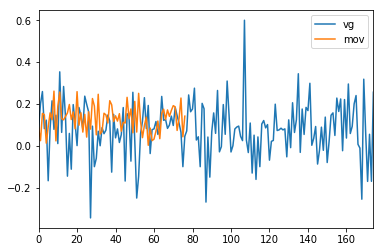

In [152]:
vg_obj_df = pd.DataFrame(vg_obj)
# vg_obj_df.head()

vg_sent_df = pd.DataFrame(vg_sent_only)
# vg_sent_df.head()

mov_obj_df = pd.DataFrame(mov_obj)
# mov_obj_df.head()

mov_sent_df = pd.DataFrame(mov_sent_only)
# mov_sent_df.head()

mylabels = ['vg', 'mov']
a = vg_sent_df.plot()
mov_sent_df.plot(ax=a)
print('Sentiment distributions compared:')
plt.legend(mylabels)
plt.show()

Objectivity of sentiment distrubitions compared:


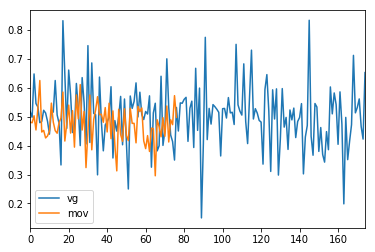

In [155]:
c = vg_obj_df.plot()
mov_obj_df.plot(ax=c)
print('Objectivity of sentiment distrubitions compared:')
plt.legend(mylabels)
plt.show()

In [156]:
# Now, let's take a look at the actual top and bottom words associated with each class.
# For this, we need to bring in some functions adapted from work of Ted Underwood
def addcounters(counter2add, countersum):
    ''' Adds all the counts in counter2add to countersum.'''
    
    for key, value in counter2add.items():
        countersum[key] += value
        
def headandtail(tuplelist, n):
    tuplelist.sort(reverse = True)
    print("TOP VALUES:")
    for i in range(n):
        print(tuplelist[i][1], tuplelist[i][0])
    
    print()
    print("BOTTOM VALUES:")
    lastindex = len(tuplelist) - 1
    for i in range(lastindex, lastindex - n, -1):
        print(tuplelist[i][1], tuplelist[i][0])

def logodds(countsA, countsB, word):
    ''' Straightforward.
    '''
    
    odds = (countsA[word] + 1) / (countsB[word] + 1)
    
    # Why do we add 1 on both sides? Two reasons. The hacky one is 
    # that otherwise we'll get a division-by-zero error whenever
    # word isn't present in countsB. The more principled reason
    # is that this technique (called Laplacian smoothing) tends
    # to reduce the dramatic disproportion likely to be found in
    # very rare words.
    
    return math.log(odds)

def signed_dunnings(countsA, totalA, countsB, totalB, word):
    ''' Less straightforward. This function calculates a signed (+1 / -1)
    version of Dunning's log likelihood. Intuitively, this is a number 
    that gets larger as the frequency of the word in our two corpora
    diverges from its EXPECTED frequency -- i.e., the frequency it would
    have if it were equally distributed over both. But it also tends to get
    larger as the raw frequency of the word increases.
    
    Note that this function requires two additional arguments:
    the total number of words in A and B. We could calculate that inside
    the function, but it's faster to calculate it just once, outside the function.
    
    Also note: the strict definition of Dunnings has no 'sign': it gets bigger
    whether a word is overrepresented in A or B. I've edited that so that Dunnings
    is positive if overrepresented in A, and negative if overrepresented in B.
    '''
    if word not in countsA and word not in countsB:
        return 0
    
    # the raw frequencies of this word in our two corpora
    # still doing a little Laplacian smoothing here
    a = countsA[word] + 0.1
    b = countsB[word] + 0.1
    
    # now let's calculate the expected number of times this
    # word would occur in both if the frequency were constant
    # across both
    overallfreq = (a + b) / (totalA + totalB)
    expectedA = totalA * overallfreq
    expectedB = totalB * overallfreq
    
    # and now the Dunning's formula
    dunning = 2 * ((a * math.log(a / expectedA)) + (b * math.log(b / expectedB)))
    
    if a < expectedA:
        return -dunning
    else:   
        return dunning


In [109]:
# Now, it's time to see the words most prevalent in each set of reviews.

# First, we create a vocab. The create_vocab fucntion takes text and 'n' which is a stand-in for max size of the vocab.
#  I'm going to try to capture all words, even though it's not necessary. It provides more flexibility for analysis,
#  though.

rev_vocab = create_vocab(review_data['review'], 20000)
print('Total vocab = ', len(rev_vocab))

# a list of common stop words to use for removing frequent words that are unenlightening:
stopwords = {'a', 'an', 'are', 'and', 'but', 'or', 'that', 'this', 'so', 
             'all', 'at', 'if', 'in', 'i', 'is', 'was', 'by', 'of', 'to', 
             'the', 'be', 'you', 'were', '–', '"'}

# Removing stopwords for more enlightening results
rev_vocab_nostop = list(set(rev_vocab) - stopwords)
print('Total vocab minus stop words = ', len(rev_vocab_nostop))

Total vocab =  13516
Total vocab minus stop words =  13492


In [110]:
video_game = Counter()
movie = Counter()

num_rows = review_data.shape[0]
print('Total number of rows in test_review_data dataset = ', num_rows)

# Figure out how many rows are in the Trump DataFrame
# and put that number in a variable like 'numrows.'
# Then iterate through the 'text' column of the data frame.

for i in range(num_rows):
    counts = tokenize(review_data['review'][i])
    if 'mov' in review_data['source'][i]:
        addcounters(counts, movie)
    elif 'vg' in review_data['source'][i]:
        addcounters(counts, video_game)

vg_count = len(video_game)
mov_count = len(movie)

print('Total movie review words = ', mov_count)
print('Total video game review words = ', vg_count)

Total number of rows in test_review_data dataset =  252
Total movie review words =  9550
Total video game review words =  7026


In [111]:
# When you get around to running Dunning's, you'll need to
# create variables that hold the total count of *all words*
# in iphone and android.

total_words = Counter()
addcounters(video_game, total_words)
addcounters(movie, total_words)

# print('Total word count = ', len(total_words))

# Create an empty list to hold pairs of (overrepresentation_measure, word)
# Then iterate through your vocabulary. For each word, measure 
# overrepresentation using either logodds or signed_dunnings.
# Create a tuple, (overrepresentation_measure, word)
# and append it to the empty list you created.

overrep_words_log = []
overrep_words_dunnings = []

for wrd in rev_vocab_nostop:
    x = signed_dunnings(movie, mov_count, video_game, vg_count, wrd)
    overrep_words_dunnings.append((x, wrd))

for word in rev_vocab:
    x = logodds(video_game, movie, word)
    overrep_words_log.append((x, word))

# Finally use the headandtail function to display the top 25 and bottom 25
# words in your tuplelist.

print('FOR LOG ODDS:')
headandtail(overrep_words_log, 25)
print('\n')
print('FOR DUNNINGS:')
headandtail(overrep_words_dunnings, 25)

FOR LOG ODDS:
TOP VALUES:
– 4.804021044733257
games 4.110873864173311
enemies 3.713572066704308
puzzles 3.4011973816621555
game 3.3758795736778655
gameplay 3.332204510175204
cards 3.295836866004329
resi 3.1780538303479458
main 3.1780538303479458
card 3.1780538303479458
campaign 3.1354942159291497
voodoo 3.091042453358316
game’s 3.091042453358316
extra 2.995732273553991
units 2.9444389791664403
you’re 2.9267394020670396
player 2.8903717578961645
missions 2.8903717578961645
i’m 2.8903717578961645
halo 2.8903717578961645
wars 2.833213344056216
collect 2.772588722239781
thimbleweed 2.70805020110221
myself 2.70805020110221
options 2.6390573296152584

BOTTOM VALUES:
film -4.350277936359301
director -3.871201010907891
documentary -3.6635616461296463
fawcett -3.332204510175204
olli -3.1780538303479458
films -3.1354942159291497
michael -3.1354942159291497
movies -3.1354942159291497
norman -3.1354942159291497
directed -3.044522437723423
drama -3.044522437723423
wife -3.044522437723423
“the -3.04

## Findings
